In [ ]:
import numpy as np
import pathlib as pl
import os 
import pandas as pd
import matplotlib.pyplot as plt

# Lift Charts for University Rank Regression

In this notebook we are going to be looking at lift charts for rank regression problems. The data you will be using is from the [Times World University Rankings](https://www.timeshighereducation.com/world-university-rankings/2022/world-ranking#!/page/0/length/25/sort_by/rank/sort_order/asc/cols/stats) from 2016. 

You will be plotting lift charts to compare how well the number of students, student-staff ratio and research ranking predicts the overall ranking of the university. The data has already been converted into rankings for each of these categories. 

## Load Data

In [2]:
path_csv = pl.Path(os.getcwd()) / f'IMP-PCMLAI-M6-Uni_Ranking.csv'
with open(path_csv, 'rb') as file:
    data = pd.read_csv(file)

data.head()
# the cols parameter gives you the list list ['research_rank', 'student_staff_ratio_rank', 'num_students_rank']
cols = list(data.columns)
cols.remove('Unnamed: 0')
cols.remove('university_name')
data = data[cols]
data.head()

,research_rank,student_staff_ratio_rank,num_students_rank,world_rank
0,182,190,1,167.0
1,54,150,2,31.0
2,187,193,3,158.0
3,173,182,4,133.0
4,55,71,5,47.0


## Section 1: Plot the lift chart for number of students

### TO DO: Plot the Lift Chart for the number of students

Remember to include the average classifier, perfect classifier and a legend for your plot. 

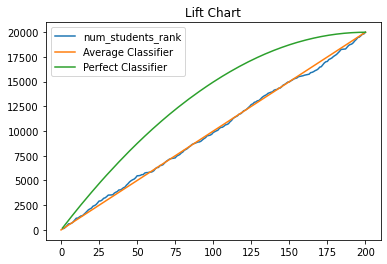

In [3]:
#### ANSWER ###

def plot_estimated_value(pred, actual, col):
    predicted_values = pred.to_numpy()
    actual_values = actual.to_numpy()

    sorted_indices = np.argsort(predicted_values)
    #descending
    sorted_indices_descending = np.flip(sorted_indices)

    sorted_predicted = predicted_values[sorted_indices_descending]
    sorted_actual = actual_values[sorted_indices_descending]
    
    cumulative_actual = np.cumsum(sorted_actual)
    X = np.arange(1,len(sorted_actual)+1)
    plt.plot(X, cumulative_actual, label=col)
    return plt

def plot_lift_chart(actual):
    actual_values = actual.to_numpy()

    #average classifier
    average_classifier = np.sum(actual_values)
    
    #perfect classifier
    sorted_desc_actual = np.sort(actual_values)[::-1]
    perfect_classifier = np.cumsum(sorted_desc_actual)

    X = np.arange(1,len(actual_values)+1)
    plt.plot((0,len(actual_values)),(0,average_classifier), label='Average Classifier')
    plt.plot(X, perfect_classifier, label='Perfect Classifier')
    plt.title('Lift Chart')
    plt.legend()
    return plt

pred, actual = data['num_students_rank'], data['world_rank']
chart = plot_estimated_value(pred,actual,col='num_students_rank')
chart = plot_lift_chart(actual)
chart.show()

## Section 2: Plot the Lift Charts for All the Models

### TO DO: Plot the lift charts for models 1, 2 & 3 on the same graph. Don't forget to include the perfect and average classifiers and include a legend in your plot. 

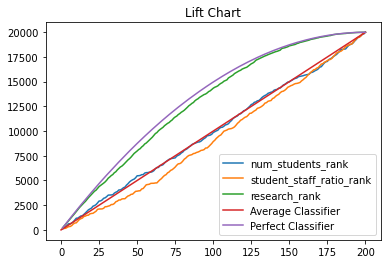

In [8]:
### ANSWER ####
#num_students_rank
pred, actual = data['num_students_rank'], data['world_rank']
chart = plot_estimated_value(pred,actual,col='num_students_rank')

#student_staff_ratio_rank
pred, actual = data['student_staff_ratio_rank'], data['world_rank']
chart = plot_estimated_value(pred,actual,col='student_staff_ratio_rank')

#research_rank
pred, actual = data['research_rank'], data['world_rank']
chart = plot_estimated_value(pred,actual,col='research_rank')

chart = plot_lift_chart(actual)

chart.show()

### TO DO: Now answer the questions in insendi that apply to this notebook 